# Edit the image dataset

This notebook shows the three-steps method carried out for the image editing:
+ 1) Cropping the image into 3 patches in order to expand the dataset.
+ 2) Convert the image to grayscale (convert from 3-banded to 1-banded).
+ 3) Correct the brightness of the image (having previously evaluated the average distribution)

In [1]:
# Load the necessary modules
import os
import PIL
from PIL import Image, ImageOps,ImageEnhance, ImageStat
import matplotlib.pyplot as plt

In [2]:
# Set the paths
path = r'D:/Capstone Project/Images_web_scraping/'
path_input_images = path + 'imagenes/'

In [3]:
# Create a list with the image names
list_images = os.listdir(path_input_images)

In [4]:
# Define the functions

def correct_brightness(img):
    
    stat_im = ImageStat.Stat(img) #Calculate the brightness by the image stats
    enhancer = ImageEnhance.Brightness(img)
    mean_plus_1std = 164 #Pre-defined value
    mean_minus_1std = 105 #Pre-defined value
    
    if stat_im.rms[0] > 0.95*mean_plus_1std:
        factor = 0.65 #darkens the image
        brightness_correction_img = enhancer.enhance(factor)
        
        return brightness_correction_img
    
    elif stat_im.rms[0] < mean_minus_1std:
        factor = 1.3 #brightens the image
        brightness_correction_img = enhancer.enhance(factor)
        
        return brightness_correction_img
    
    else:
        return img
         
def edit_image(img):
    
    # Crop the image into 3 images of 250x250
    size = 250
    cropped_img1 = img.crop((1280-size,470-size,1280,470)) #First crop
    cropped_img2 = img.crop(((1280-size*2),(440-size),1280-size,440)) #Second crop
    cropped_img3 = img.crop(((1280-size*3),(410-size),(1280-size*2),410)) #Third crop
    cropped_imgs = [cropped_img1,cropped_img2,cropped_img3]
    
    # Convert to grayscale (convert from 3-banded to 1-banded)
    grayscale_imgs = []
    for img in cropped_imgs:
        grayscale_imgs.append(ImageOps.grayscale(img))

    # Correct brightness
    brightness_imgs = []
    for img in grayscale_imgs:
        brightness_imgs.append(correct_brightness(img))  

  
    return brightness_imgs

In [5]:
# Run the function
for image in list_images:
    # Import the image
    img = PIL.Image.open(path_input_images+image)
    # Run the function
    edited_img = edit_image(img)
    # Save the output images
    edited_img[2].save(path+'edited_images/'+image[0:-4]+"_patch1"+image[-4:])
    edited_img[1].save(path+'edited_images/'+image[0:-4]+"_patch2"+image[-4:])
    edited_img[0].save(path+'edited_images/'+image[0:-4]+"_patch3"+image[-4:])

### Original images

Original images:
width, height:(1280, 960)
Mode:RGB


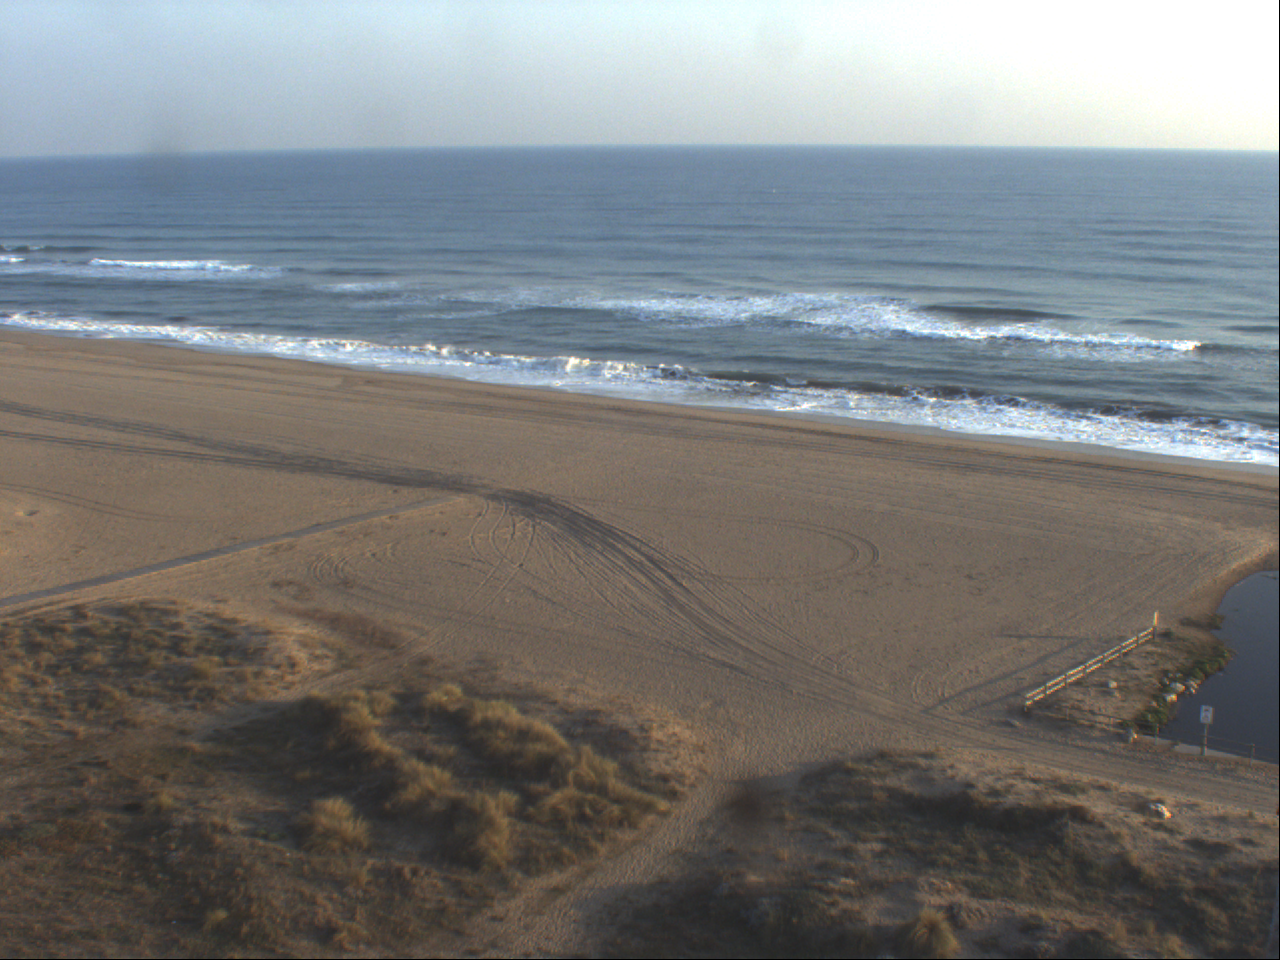

In [9]:
from IPython.display import Image
img = PIL.Image.open(path_input_images+"image_2012020316.png")
print("Original images:\nwidth, height:{0}\nMode:{1}".format(img.size,img.mode))
display(img)

### Edited images

Edited images:
width, height:(250, 250)
Mode:L


(([], []), ([], []))

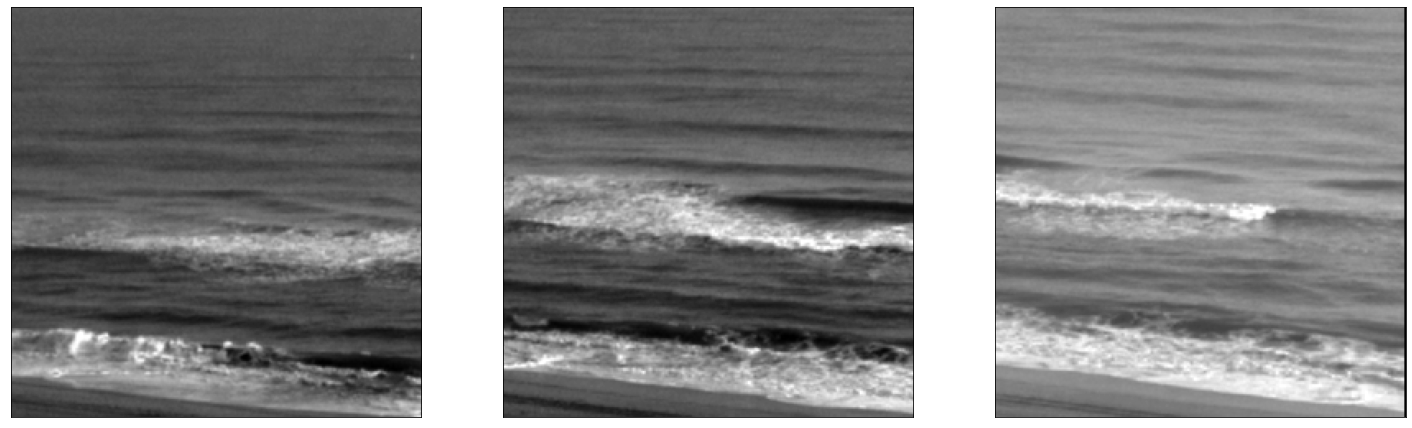

In [13]:
edited_img = [PIL.Image.open(path+"edited_images/"+"image_2012020316_patch1.png"),
              PIL.Image.open(path+"edited_images/"+"image_2012020316_patch2.png"), 
              PIL.Image.open(path+"edited_images/"+"image_2012020316_patch3.png")]

print("Edited images:\nwidth, height:{0}\nMode:{1}".format(edited_img[0].size,edited_img[0].mode))

plt.gcf().set_size_inches(25,25)
plt.subplot(131),plt.imshow(edited_img[0],cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(edited_img[1],cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(edited_img[2],cmap='gray')
plt.xticks([]), plt.yticks([])